This notebook creates simple examples of linear regressions on some of our income and expenditure data.  This will serve as a starting point for later regression analysis and as examples for students.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from drs_sentani import get_survey
survey = get_survey()
import pysentani as sti

In [2]:
sti.similar_columns(survey, 'income')
# statsmodels cannot handle the slashes so I rename the column
survey['reg_income'] = survey['group_income_reg/electric_income']

group_income_reg/electric_income
group_income_reg/electric_income_freq
electric_income_y_n
group_electric_income/electric_income_desc
group_electric_income/electric_income
group_electric_income/electric_income_freq


Statsmodels performs regression modeling.

In [3]:
import statsmodels.formula.api as smf
results = smf.ols('reg_income ~ _gps_point_longitude', data=survey).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             reg_income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.881
Date:                Fri, 16 Oct 2015   Prob (F-statistic):             0.0900
Time:                        13:12:16   Log-Likelihood:                -17327.
No. Observations:                1003   AIC:                         3.466e+04
Df Residuals:                    1001   BIC:                         3.467e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -9.537e+08   5.63e+08     -1.695      0.090     -2.06e+09   1.5e+08
_gps_point_longitude  6.795e+06      4e+06      1.697      0.090     -1.06e+06  1.47e+07
==============================================================================
Omnibus:                     2679.878   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35053782.136
Skew:                          29.653   Prob(JB):                         0.00
Kurtosis:                     916.924   Cond. No.                     3.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seaborn has some good plotting functions that show the linear fit and confidence intervals of the fit.

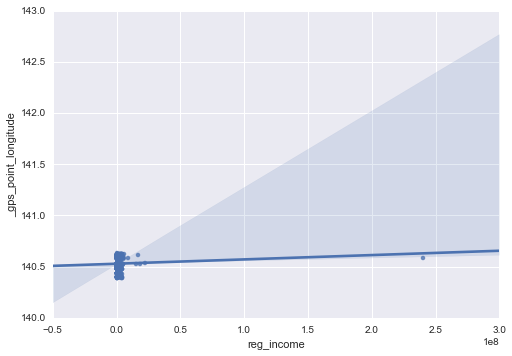

In [4]:
sns.regplot('reg_income', '_gps_point_longitude', survey)